In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
data = pd.read_csv('../dataset/data_5diagnosis.csv')
df = data.drop('Diagnosis', axis=1)
diagnosis=data.Diagnosis

## ACP

In [39]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
pcs = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 3)])
X['z'] = data['Diagnosis']
pcs['z'] = data['Diagnosis']

## LDA/QDA/NB

In [40]:
models = [
(LinearDiscriminantAnalysis, "LDA"),
(QuadraticDiscriminantAnalysis, "QDA"),
(GaussianNB, "NB"),
]
def validation_errors(df, models):
    y = df.z
    X = df.drop(columns=["z"])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc

scores_discri = pd.DataFrame(validation_errors(pcs, models), columns=["Model", "Acc"])

print(scores_discri)

   Model       Acc
0    LDA  0.571429
1    LDA  0.621622
2    LDA  0.792793
3    LDA  0.756757
4    LDA  0.702703
5    LDA  0.747748
6    LDA  0.711712
7    LDA  0.702703
8    LDA  0.549550
9    LDA  0.594595
10   QDA  0.580357
11   QDA  0.612613
12   QDA  0.783784
13   QDA  0.801802
14   QDA  0.684685
15   QDA  0.774775
16   QDA  0.720721
17   QDA  0.720721
18   QDA  0.522523
19   QDA  0.531532
20    NB  0.553571
21    NB  0.612613
22    NB  0.792793
23    NB  0.801802
24    NB  0.684685
25    NB  0.738739
26    NB  0.720721
27    NB  0.702703
28    NB  0.450450
29    NB  0.594595


## KNN

In [41]:
cls = KNeighborsClassifier(n_neighbors=4)
cls.fit(pcs.drop(columns="z"),diagnosis)

scores_KNN = pd.DataFrame(cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10))
scores_KNN = scores_KNN.rename(columns={0: 'Acc'})
scores_KNN.insert(loc=0, column='Model', value='KNN')
print(scores_KNN)

  Model       Acc
0   KNN  0.526786
1   KNN  0.774775
2   KNN  0.855856
3   KNN  0.900901
4   KNN  0.837838
5   KNN  0.909910
6   KNN  0.891892
7   KNN  0.738739
8   KNN  0.522523
9   KNN  0.576577


## Régression logistique

In [44]:
#linéaire
cls = LogisticRegression(penalty=None)
cls.fit(pcs.drop(columns="z"), diagnosis)
scores_reg_lin = pd.DataFrame(cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'))
scores_reg_lin = scores_reg_lin.rename(columns={0: 'Acc'})
scores_reg_lin.insert(loc=0, column='Model', value='LRL')
#multiple
poly = PolynomialFeatures(degree=3)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(pcs.drop(columns="z"), diagnosis)
scores_reg_quad = pd.DataFrame(cross_val_score(cls, pcs.drop(columns="z"), diagnosis, cv=10, scoring='accuracy'))
scores_reg_quad = scores_reg_quad.rename(columns={0: 'Acc'})
scores_reg_quad.insert(loc=0, column='Model', value='LRQ')

print(scores_reg_lin)
print(scores_reg_quad)

  Model       Acc
0   LRL  0.589286
1   LRL  0.621622
2   LRL  0.765766
3   LRL  0.747748
4   LRL  0.657658
5   LRL  0.765766
6   LRL  0.711712
7   LRL  0.729730
8   LRL  0.549550
9   LRL  0.603604
  Model       Acc
0   LRQ  0.598214
1   LRQ  0.612613
2   LRQ  0.765766
3   LRQ  0.747748
4   LRQ  0.675676
5   LRQ  0.765766
6   LRQ  0.711712
7   LRQ  0.720721
8   LRQ  0.549550
9   LRQ  0.612613


c:\users\felic\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Analyse graphique

   Model       Acc
0    LDA  0.571429
1    LDA  0.621622
2    LDA  0.792793
3    LDA  0.756757
4    LDA  0.702703
5    LDA  0.747748
6    LDA  0.711712
7    LDA  0.702703
8    LDA  0.549550
9    LDA  0.594595
10   QDA  0.580357
11   QDA  0.612613
12   QDA  0.783784
13   QDA  0.801802
14   QDA  0.684685
15   QDA  0.774775
16   QDA  0.720721
17   QDA  0.720721
18   QDA  0.522523
19   QDA  0.531532
20    NB  0.553571
21    NB  0.612613
22    NB  0.792793
23    NB  0.801802
24    NB  0.684685
25    NB  0.738739
26    NB  0.720721
27    NB  0.702703
28    NB  0.450450
29    NB  0.594595
30   KNN  0.526786
31   KNN  0.774775
32   KNN  0.855856
33   KNN  0.900901
34   KNN  0.837838
35   KNN  0.909910
36   KNN  0.891892
37   KNN  0.738739
38   KNN  0.522523
39   KNN  0.576577
40   LRL  0.589286
41   LRL  0.621622
42   LRL  0.765766
43   LRL  0.747748
44   LRL  0.657658
45   LRL  0.765766
46   LRL  0.711712
47   LRL  0.729730
48   LRL  0.549550
49   LRL  0.603604
50   LRQ  0.598214
51   LRQ  0.

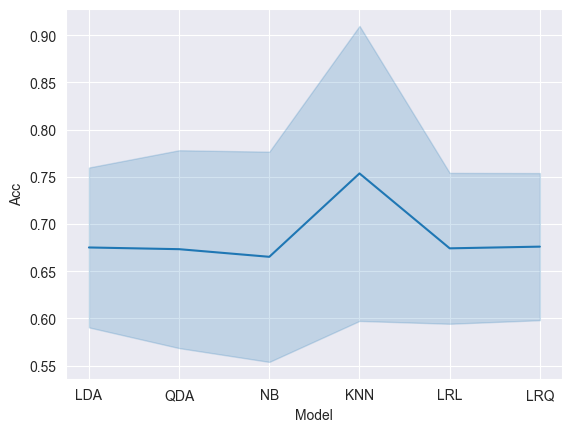

In [46]:
scores= pd.concat([scores_discri, scores_KNN, scores_reg_lin, scores_reg_quad], ignore_index=True)
print(scores)
sns.lineplot(x="Model", y="Acc", data=scores, errorbar='sd')
plt.show()